In [2]:
import os
import calendar
import csv
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import re
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, time

#El csv debe estar en el mismo folder del archivo python
current_dir = os.getcwd()
filename = "datasets/Estadisticas.csv"

dataset_path = os.path.join(current_dir, filename)
df = pd.read_csv(dataset_path)

df.head()

,Delito,SubDelito,Fecha,Hora,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton,Distrito
0,ASALTO,ARMA BLANCA,2023-02-01,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SANTA ANA,NaN
1,ASALTO,ARMA BLANCA,2023-02-04,03:00:00 - 05:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,DESCONOCIDO,COSTA RICA,SAN JOSE,SAN JOSE,NaN
2,ASALTO,ARMA BLANCA,2023-02-08,12:00:00 - 14:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,PARAISO,NaN
3,ASALTO,ARMA BLANCA,2023-02-20,00:00:00 - 02:59:59,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,OROTINA,NaN
4,ASALTO,ARMA BLANCA,2023-02-19,18:00:00 - 20:59:59,PERSONA,PEATON [PERSONA],Desconocido,MUJER,COSTA RICA,CARTAGO,OREAMUNO,NaN


# Analisis Exploratorio de Datos

In [3]:
df.columns

Index(['Delito', 'SubDelito', 'Fecha', 'Hora', 'Victima', 'SubVictima', 'Edad',
       'Sexo', 'Nacionalidad', 'Provincia', 'Canton', 'Distrito'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Delito        96878 non-null  object 
 1   SubDelito     96878 non-null  object 
 2   Fecha         96878 non-null  object 
 3   Hora          96878 non-null  object 
 4   Victima       96878 non-null  object 
 5   SubVictima    96878 non-null  object 
 6   Edad          96878 non-null  object 
 7   Sexo          96878 non-null  object 
 8   Nacionalidad  96878 non-null  object 
 9   Provincia     96878 non-null  object 
 10  Canton        96878 non-null  object 
 11  Distrito      0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 8.9+ MB


In [5]:
# Drop de la columna Distrito ya que no aporta datos
if 'Distrito' in df.columns:
    df.drop('Distrito', axis=1, inplace=True)

#convertir tipo de dato de la columna Fecha a Datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96878 entries, 0 to 96877
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Delito        96878 non-null  object        
 1   SubDelito     96878 non-null  object        
 2   Fecha         96878 non-null  datetime64[ns]
 3   Hora          96878 non-null  object        
 4   Victima       96878 non-null  object        
 5   SubVictima    96878 non-null  object        
 6   Edad          96878 non-null  object        
 7   Sexo          96878 non-null  object        
 8   Nacionalidad  96878 non-null  object        
 9   Provincia     96878 non-null  object        
 10  Canton        96878 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 8.1+ MB


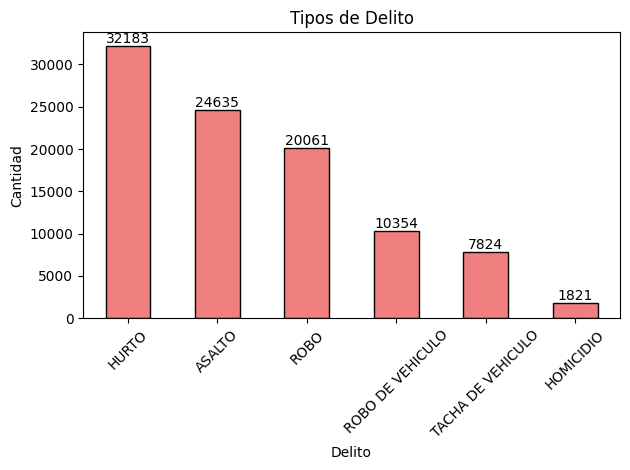

In [6]:
# Convertir solo las columnas de tipo 'object' a 'str'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str)

delitos = df['Delito'].value_counts()

delitos.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Tipos de Delito')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

# Agregar el total sobre cada barra
for i, count in enumerate(delitos):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')


str_cols = df.select_dtypes(include=['object']).columns

df[str_cols] = df[str_cols].astype(str)

plt.tight_layout()
plt.show()

In [7]:
df['SubDelito'].value_counts()

SubDelito
POR DESCUIDO                      16839
FORZADURA                         11092
ARMA DE FUEGO                      9530
TACHA DE VEHICULO                  7824
POR CONFIANZA                      6108
CARTERISTA                         5947
ARMA BLANCA                        5662
DESCUIDO                           5413
ARREBATO                           3718
BOQUETE                            2554
GOLPES                             2408
ESCALAMIENTO                       2373
ASALTO                             2264
OTRO O INDETERMINADO               2172
COCHERAZO                          1537
CORTA CANDADOS                     1281
ARDID PREVIO/DISTRACCION           1279
INTIMIDACION VERBAL                1274
RUPTURA VENTANA                    1271
AJUSTE DE CUENTAS/VENGANZA         1257
CON LLAVE                           927
QUITAN CELOSIAS                     873
CANDADO CHINO                       732
INMOVILIZACION                      668
PROGRESIVOS                   

In [8]:
# Frecuencua de delitos por mes
meses = df['Fecha'].dt.month.value_counts().to_frame("Delitos").sort_values(by="Fecha")

months = list(calendar.month_name)[1:]
meses['Mes'] = months
meses = meses.reset_index(drop=True)
meses

,Delitos,Mes
0,7104,January
1,10818,February
2,8247,March
3,7707,April
4,8096,May
5,7733,June
6,8009,July
7,8140,August
8,8176,September
9,7951,October


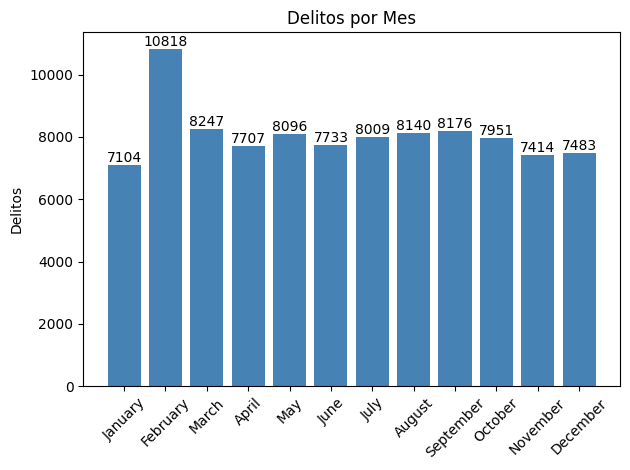

In [9]:
plt.bar(meses['Mes'], meses['Delitos'], color='steelblue')
plt.title('Delitos por Mes')
plt.ylabel('Delitos')
plt.xticks(rotation=45)

# Agregar el total sobre cada barra
for i, count in enumerate(meses['Delitos']):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [10]:
df['Hora'].value_counts()

Hora
00:00:00 - 02:59:59    19127
18:00:00 - 20:59:59    15280
15:00:00 - 17:59:59    12486
21:00:00 - 23:59:59    12132
12:00:00 - 14:59:59    11956
09:00:00 - 11:59:59    10419
03:00:00 - 05:59:59     7771
06:00:00 - 08:59:59     7707
Name: count, dtype: int64

In [11]:
# Remover los rows donde se desconoce el lugar del Delito
df = df[df['Provincia'] != "DESCONOCIDO"]
# Rellenar los datos de Canton con el valor de la provincia cuando Canton = DESCONOCIDO
df['Canton'] =  df['Canton'].where(df['Canton'] != 'DESCONOCIDO', df['Provincia'])
#La unica excepcion es Guanacaste cuyo Canton Central no es Guanacaste si no Liberia
df['Canton'] = df['Canton'].where(df['Canton'] != 'GUANACASTE', 'LIBERIA')

print(df.dtypes)

Delito                  object
SubDelito               object
Fecha           datetime64[ns]
Hora                    object
Victima                 object
SubVictima              object
Edad                    object
Sexo                    object
Nacionalidad            object
Provincia               object
Canton                  object
dtype: object


# Transformacion de los datos para uso en Fuzzy Expert Systems

In [12]:
# Esta funcion hace los toma los valores de la hora y los clasifica
# en Madrugada, Mañana, Tarde o Noche de acuerdo al rango horario
def hour_fuzzier(hour_range):
    time_string = hour_range.split("-")[1].strip()

    dawn_start = time(00, 00, 00)
    dawn_end = time(5, 59, 59)
    morn_start = time(6, 00, 00)
    morn_end = time(11, 59, 59)
    aftn_start = time(12, 00, 00)
    aftn_end = time(17, 59, 59)
    nigt_start = time(18, 00, 00)
    nigt_end = time(23, 59, 59)
    
    #print(time_string)   
    time_object = datetime.strptime(time_string, "%H:%M:%S").time()
    if dawn_start <= time_object <= dawn_end:
        return "Madrugada"
    elif morn_start <= time_object <= morn_end:
        return "Mañana"
    elif aftn_start <= time_object <= aftn_end:
        return "Tarde"
    else:
        return "Noche"

#Insertar la columna fuzzy para la hora del delito en el dataframe    
fuzzy_time_col = df['Hora'].apply(lambda x: hour_fuzzier(x))
df.insert(4, "Hora Fuzzy", fuzzy_time_col)
df.head()

,Delito,SubDelito,Fecha,Hora,Hora Fuzzy,Victima,SubVictima,Edad,Sexo,Nacionalidad,Provincia,Canton
0,ASALTO,ARMA BLANCA,2023-02-01,18:00:00 - 20:59:59,Noche,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,SAN JOSE,SANTA ANA
1,ASALTO,ARMA BLANCA,2023-02-04,03:00:00 - 05:59:59,Madrugada,PERSONA,PEATON [PERSONA],Mayor de edad,DESCONOCIDO,COSTA RICA,SAN JOSE,SAN JOSE
2,ASALTO,ARMA BLANCA,2023-02-08,12:00:00 - 14:59:59,Tarde,PERSONA,PEATON [PERSONA],Mayor de edad,HOMBRE,COSTA RICA,CARTAGO,PARAISO
3,ASALTO,ARMA BLANCA,2023-02-20,00:00:00 - 02:59:59,Madrugada,PERSONA,PEATON [PERSONA],Mayor de edad,MUJER,COSTA RICA,ALAJUELA,OROTINA
4,ASALTO,ARMA BLANCA,2023-02-19,18:00:00 - 20:59:59,Noche,PERSONA,PEATON [PERSONA],Desconocido,MUJER,COSTA RICA,CARTAGO,OREAMUNO


In [13]:
# Intentaremos hacer una Fuzzy sobre la incidencia de un delito dado
# La incidencia del delito seria la cantidad de delitos de este tipo dividido entre la cantidad total de delitos
# posteriormente con todas las incidencias se pueden clasificar 

#Tabla de incidencia 
incidence = df.groupby(['Provincia', 'Canton', 'Hora Fuzzy']).size().reset_index(name="Incidencia")

#Pivotea los valores de Incidencia como columnas y los tamaños del conjunto como valores
piv_df = incidence.pivot_table(index=['Provincia', 'Canton'], columns='Hora Fuzzy', values='Incidencia', fill_value=0).reset_index()

#Formatea la tabla resultante
piv_df.columns.name = None # Remover el nombre de las columnas
piv_df = piv_df.rename_axis(None, axis=1)

#Convertir los valores de float a enteros
f_cols = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
piv_df[f_cols] = piv_df[f_cols].map(np.int64)

piv_df['Total'] = piv_df['Madrugada'] + piv_df['Mañana'] + piv_df['Tarde'] + piv_df['Noche'] 


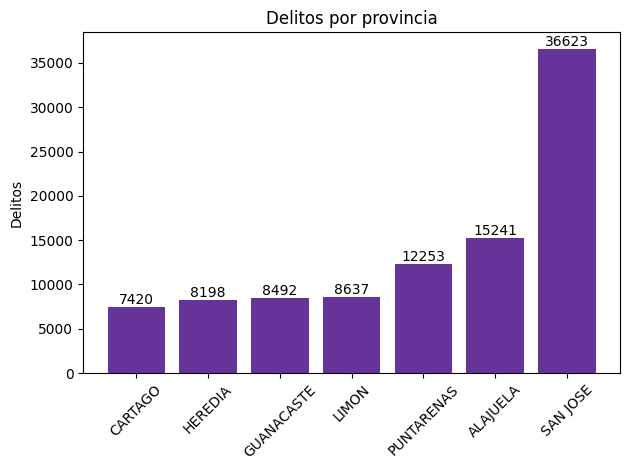

In [14]:
tdf = piv_df.groupby('Provincia').sum().reset_index()
tdf.drop('Canton', axis=1, inplace=True)
prov_totals = tdf[['Provincia', 'Total']].sort_values(by='Total')

plt.bar(prov_totals['Provincia'], prov_totals['Total'], color='rebeccapurple')
plt.title('Delitos por provincia')
plt.ylabel('Delitos')
plt.xticks(rotation=45)

# Agregar el total sobre cada barra
for i, count in enumerate(prov_totals['Total']):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [15]:
def province_percentile(x):
    province = x['Provincia']
    c_total = x['Total']
    total = prov_totals.loc[prov_totals['Provincia'] == province, 'Total'].values[0]  # Extracts the first matching value
    return (c_total/total)* 100


piv_df['Perc Provincia'] = piv_df.apply(province_percentile, axis=1)

total_incidents = piv_df['Total'].sum()

piv_df['Perc Pais'] = piv_df.apply(lambda x: 0 if x['Total'] == 0 else ((x['Total']/total_incidents) * 100) , axis=1)

piv_df.sample(15)

,Provincia,Canton,Madrugada,Mañana,Noche,Tarde,Total,Perc Provincia,Perc Pais
29,GUANACASTE,LA CRUZ,99,79,47,53,278,3.273669,0.287000
76,SAN JOSE,PEREZ ZELEDON,761,481,564,581,2387,6.517762,2.464280
23,CARTAGO,TURRIALBA,352,249,214,206,1021,13.760108,1.054055
10,ALAJUELA,SAN CARLOS,719,571,752,789,2831,18.574897,2.922654
43,HEREDIA,SANTO DOMINGO,162,120,180,150,612,7.465235,0.631814
57,PUNTARENAS,MONTES DE ORO,29,24,46,46,145,1.183384,0.149694
56,PUNTARENAS,GOLFITO,265,108,153,142,668,5.451726,0.689627
18,CARTAGO,EL GUARCO,148,85,128,106,467,6.293801,0.482119
4,ALAJUELA,LOS CHILES,135,131,187,159,612,4.015485,0.631814
36,HEREDIA,BELEN,125,88,313,129,655,7.989754,0.676206


In [16]:
piv_df.describe()

,Madrugada,Mañana,Noche,Tarde,Total,Perc Provincia,Perc Pais
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,320.071429,215.785714,326.309524,290.976190,1153.142857,8.333333,1.190476
std,605.177835,418.600769,666.133095,620.624811,2298.756972,10.698237,2.373180
min,14.000000,7.000000,9.000000,14.000000,72.000000,0.196598,0.074331
25%,96.750000,55.750000,65.000000,61.500000,276.750000,1.938849,0.285710
50%,173.500000,118.000000,179.000000,149.500000,612.000000,4.724898,0.631814
75%,303.000000,229.000000,323.500000,293.500000,1203.750000,8.285967,1.242722
max,5218.000000,3574.000000,5692.000000,5392.000000,19876.000000,54.271906,20.519491


Text(0.5, 0, 'Cantones')

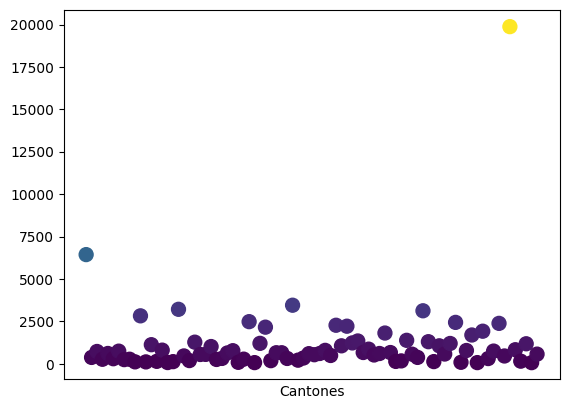

In [17]:
plt.scatter(piv_df['Canton'], piv_df['Total'], c=piv_df['Total'], cmap='viridis', s=100)
plt.xticks([]) # remover etiquetas en x
plt.xlabel('Cantones')

<Axes: >

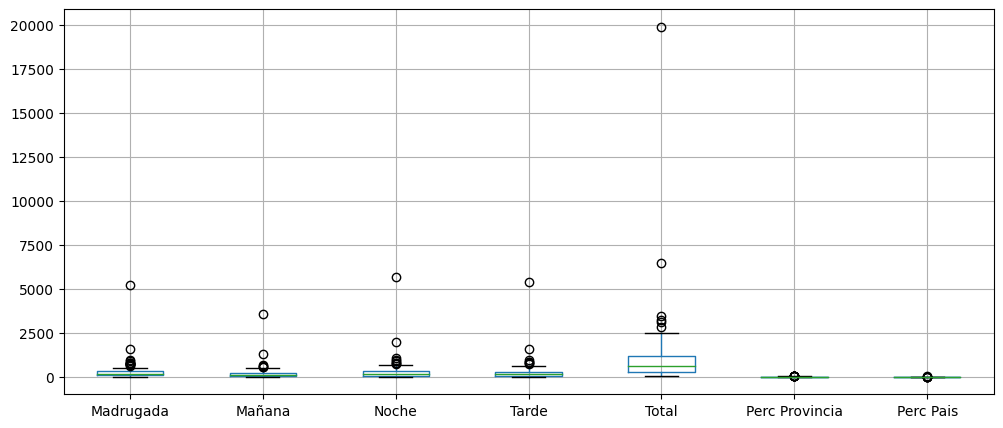

In [18]:
plt.figure(figsize=(12, 5))
piv_df.boxplot()

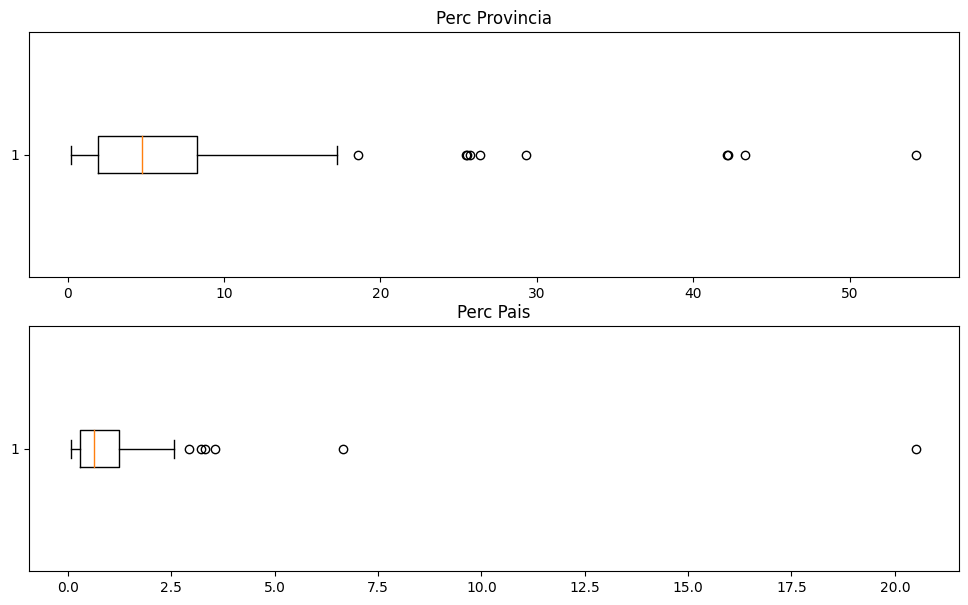

In [19]:
plt.figure(figsize=(12,7))

plt.subplot(2,1,1)
plt.boxplot(piv_df['Perc Provincia'], vert=False)
plt.title('Perc Provincia')

plt.subplot(2,1,2)
plt.boxplot(piv_df['Perc Pais'], vert=False)
plt.title('Perc Pais')

plt.show()

In [20]:
# Debido a la distribucion de los datos se usaran los Quartiles para determinar las categorias de incidencia de Delitos 

q1 = piv_df['Total'].quantile(0.15)
q2 = piv_df['Total'].quantile(0.38)
q3 = piv_df['Total'].quantile(0.62)
q4 = piv_df['Total'].quantile(0.85)

def place_ranker(incidents):
    if incidents <= q1:
        return 'Muy Baja'
    elif q1 < incidents < q2:
        return 'Baja'
    elif q2 <= incidents < q3:
        return 'Moderada'
    elif q3 <= incidents < q4:
        return 'Alta'
    else:
        return 'Muy Alta'

piv_df['Incidencia'] = piv_df['Total'].apply(place_ranker)

piv_df.head()

,Provincia,Canton,Madrugada,Mañana,Noche,Tarde,Total,Perc Provincia,Perc Pais,Incidencia
0,ALAJUELA,ALAJUELA,1593,1275,1972,1600,6440,42.254445,6.648497,Muy Alta
1,ALAJUELA,ATENAS,116,60,104,100,380,2.493275,0.392303,Baja
2,ALAJUELA,GRECIA,162,144,240,184,730,4.789712,0.753634,Moderada
3,ALAJUELA,GUATUSO,118,64,45,44,271,1.778099,0.279774,Baja
4,ALAJUELA,LOS CHILES,135,131,187,159,612,4.015485,0.631814,Moderada


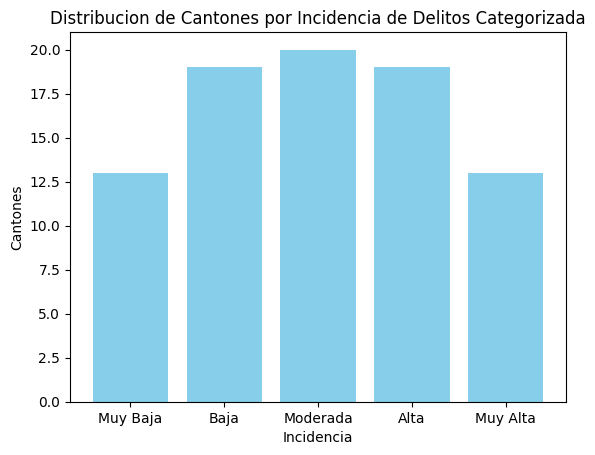

In [21]:
cat_order = ['Muy Baja', 'Baja', 'Moderada', 'Alta', 'Muy Alta']
inc_d = piv_df['Incidencia'].value_counts().reset_index()
inc_d['Incidencia'] = pd.Categorical(inc_d['Incidencia'], categories=cat_order, ordered=True)
inc_d = inc_d.sort_values(by='Incidencia')

plt.bar(inc_d['Incidencia'], inc_d['count'], color='skyblue')

# Add labels and title
plt.xlabel('Incidencia')
plt.ylabel('Cantones')
plt.title('Distribucion de Cantones por Incidencia de Delitos Categorizada')
plt.show()

In [22]:

piv_df.to_csv('incidencia.csv', index=False)

eng_df = piv_df.rename(columns={
    'Provincia': 'Province', 
    'Madrugada': 'Crimes at Noon', 
    'Mañana': 'Crimes at Morning', 
    'Noche': 'Crimes at Night', 
    'Tarde': 'Crimes at Afternoon',
    'Total': 'Total Crimes',
    'Perc Provincia': 'Province Percentage',
    'Perc Pais': 'Country Percentage',
    'Incidencia': 'Crime Rate'})

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

eng_df = swap_columns(eng_df, 'Crimes at Night', 'Crimes at Afternoon')

mapping = {'Muy Alta': 'Very High', 'Alta': 'High', 'Moderada': 'Modarate', 'Baja': 'Low', 'Muy Baja': 'Very Low' }

eng_df['Crime Rate'] = eng_df['Crime Rate'].map(mapping)

eng_df.head()

eng_df.to_csv('crime_incidence.csv', index=False)

## Crear Woking table de la composicion de la criminalidad por Provicia y Canton

In [23]:
#Tabla de Composicion de crimen
crimes_comp = df.groupby(['Provincia', 'Canton', 'Delito', 'SubDelito', 'Sexo']).size().reset_index(name="Incidencia")

combinations = crimes_comp[['Delito', 'SubDelito']].drop_duplicates()
combinations

,Delito,SubDelito
0,ASALTO,ARMA BLANCA
3,ASALTO,ARMA CONTUNDENTE
5,ASALTO,ARMA DE FUEGO
8,ASALTO,ARREBATO
11,ASALTO,CANDADO CHINO
14,ASALTO,GOLPES
17,ASALTO,INMOVILIZACION
20,ASALTO,INTIMIDACION VERBAL
23,ASALTO,OTRO O INDETERMINADO
26,ASALTO,USO DE GAS


Los delitos violentos se refieren a delitos que involucran fuerza o amenaza de fuerza, que involucran un \
comportamiento que intencionalmente amenazante, intentan o realmente provocan daño físico. \
En el Programa UCR del FBI, los delitos violentos se componen de homicidio, violación forzada, robo y asalto agravado.


La base de datos no aporta suficiente informacion para hacer una correcta categorizacion del nivel de Violencia o Gravedad de \
los delitos. Por ejemplo: Homicidio podria catalogarse como el mas grave de los delitos pero a su vez podria no ser el mas violento \
o su gravedad podria disminuir si el homicidio fuera 'imprudencial'.

Tras observar las combinaciones de Delito y Subdelito, se decidio dar la siguiente clasificacion a los delitos:
* Homicidio → Grave
* Aalto → Grave
* Hurto → Leve
* Robo → Moderado
* Robo de Vehiculo → depende del agravante → Grave/Leve/Moderado

In [24]:
# Clasificacion de la serveridad del delito
def severity_classifier(row):
    crime = row['Delito']
    if crime == 'HOMICIDIO' or crime == 'ASALTO':
        return 'Grave'
    elif crime == 'HURTO':
        return 'Leve'
    elif crime == 'ROBO':
        return 'Moderado'
    elif crime == 'ROBO DE VEHICULO':
        subcrime = row['SubDelito']
        if subcrime in ['DESCUIDO', 'COCHERAZO', 'POR CONFIANZA', 'OTRO O INDETERMINADO', 'DESCONOCIDO']:
            return 'Moderado'
        else:
            return 'Grave'
    else:
        return 'Leve'


crimes_comp['SubDelito'] = crimes_comp.apply(severity_classifier, axis=1)

crime_index = crimes_comp.rename(columns={'SubDelito': 'Severidad', 'Sexo': 'Genero de la Victima'})

crime_index = crime_index.groupby(['Provincia', 'Canton', 'Delito', 'Severidad', 'Genero de la Victima'])['Incidencia'].sum().reset_index(name="Cantidad")

crime_index.head()

,Provincia,Canton,Delito,Severidad,Genero de la Victima,Cantidad
0,ALAJUELA,ALAJUELA,ASALTO,Grave,DESCONOCIDO,91
1,ALAJUELA,ALAJUELA,ASALTO,Grave,HOMBRE,1011
2,ALAJUELA,ALAJUELA,ASALTO,Grave,MUJER,402
3,ALAJUELA,ALAJUELA,HOMICIDIO,Grave,DESCONOCIDO,3
4,ALAJUELA,ALAJUELA,HOMICIDIO,Grave,HOMBRE,79


In [25]:
# De este dataframe podemos derivar delitos por genero 
crimes_by_victim_gender = crime_index.pivot_table(
    index=['Provincia', 'Canton', 'Delito'],
    columns='Genero de la Victima',
    values='Cantidad',
    aggfunc='sum',
    fill_value=0
).reset_index()

#Formatea la tabla resultante
crimes_by_victim_gender.columns.name = None # Remover el nombre de las columnas
crimes_by_victim_gender = crimes_by_victim_gender.rename_axis(None, axis=1)

#Convertir los valores de float a enteros
gen_cols = ['DESCONOCIDO', 'HOMBRE', 'MUJER']
crimes_by_victim_gender[gen_cols] = crimes_by_victim_gender[gen_cols].map(np.int64)

crimes_by_victim_gender['Total'] = crimes_by_victim_gender['DESCONOCIDO'] + crimes_by_victim_gender['HOMBRE'] + crimes_by_victim_gender['MUJER']

crimes_by_victim_gender = crimes_by_victim_gender.rename(columns={'DESCONOCIDO': 'Desconocido', 'HOMBRE': 'Hombre', 'MUJER': 'Mujer'})

crimes_by_victim_gender.to_csv('crime_type_by_victim_gender.csv', index=False)

crimes_by_victim_gender


,Provincia,Canton,Delito,Desconocido,Hombre,Mujer,Total
0,ALAJUELA,ALAJUELA,ASALTO,91,1011,402,1504
1,ALAJUELA,ALAJUELA,HOMICIDIO,3,79,5,87
2,ALAJUELA,ALAJUELA,HURTO,197,911,658,1766
3,ALAJUELA,ALAJUELA,ROBO,257,570,422,1249
4,ALAJUELA,ALAJUELA,ROBO DE VEHICULO,68,1001,200,1269
...,...,...,...,...,...,...,...
493,SAN JOSE,VASQUEZ DE CORONADO,HOMICIDIO,1,9,1,11
494,SAN JOSE,VASQUEZ DE CORONADO,HURTO,16,79,58,153
495,SAN JOSE,VASQUEZ DE CORONADO,ROBO,31,54,29,114
496,SAN JOSE,VASQUEZ DE CORONADO,ROBO DE VEHICULO,1,77,27,105


In [26]:
crime_type_by_zone = crime_index.drop(columns=['Severidad', 'Genero de la Victima'])

crime_type_by_zone = crime_type_by_zone.pivot_table(
    index=['Provincia', 'Canton'],
    columns='Delito',
    values='Cantidad',
    aggfunc='sum',
    fill_value=0
).reset_index()

crime_type_by_zone = crime_type_by_zone.rename(columns={
    'ASALTO': 'Asaltos',
    'HOMICIDIO': 'Homicidios',
    'HURTO': 'Hurtos',
    'ROBO': 'Robos',
    'ROBO DE VEHICULO': 'Robo de Vehiculos',
    'TACHA DE VEHICULO': 'Tacha de Vehiculos'
})

crime_type_by_zone = crime_type_by_zone.rename_axis(None, axis=1)

crime_type_by_zone['Total'] = crime_type_by_zone['Asaltos'] + crime_type_by_zone['Homicidios'] + crime_type_by_zone['Hurtos'] + crime_type_by_zone['Robos'] + crime_type_by_zone['Robo de Vehiculos'] + crime_type_by_zone['Tacha de Vehiculos']

crime_type_by_zone.to_csv('crime_types_by_zone.csv', index=False)

crime_type_by_zone

,Provincia,Canton,Asaltos,Homicidios,Hurtos,Robos,Robo de Vehiculos,Tacha de Vehiculos,Total
0,ALAJUELA,ALAJUELA,1504,87,1766,1249,1269,565,6440
1,ALAJUELA,ATENAS,32,7,83,128,104,26,380
2,ALAJUELA,GRECIA,87,8,207,239,169,20,730
3,ALAJUELA,GUATUSO,19,1,121,100,23,7,271
4,ALAJUELA,LOS CHILES,91,16,219,223,52,11,612
...,...,...,...,...,...,...,...,...,...
79,SAN JOSE,SANTA ANA,137,8,346,123,113,106,833
80,SAN JOSE,TARRAZU,16,1,64,69,4,5,159
81,SAN JOSE,TIBAS,315,14,353,146,214,142,1184
82,SAN JOSE,TURRUBARES,4,1,10,45,4,8,72
